<a href="https://colab.research.google.com/github/tmt1611/4GMM_ProjetML/blob/main/Projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

# Load data, rename columns, select variables

Rename column and select variable according to the project requirement and saved as loading.csv

Use directly loading.csv and bio.csv from now on.

In [5]:
# path    = ''  # If data already in current directory
# biodeg = pd.read_csv(path + 'biodeg.csv', header = None, sep = ";")

In [6]:
# f = open("info.txt", "r")
# abbv = pd.DataFrame(columns = ["Abbreviation"])
# line = "aaa"
# while len(line):
#     line = f.readline()
#     if not line : 
#         break
#     info = line.split(") ",1)[1][:-2]
#     abbv.loc[len(abbv)] = info.split(": ",1)[0]

In [7]:
# name_keep_index = [0, 1, 7, 11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 26, 27, 29,30, 35, 36, 38]
# names = abbv.iloc[name_keep_index,:]
# loading = biodeg.iloc[:, name_keep_index]
# loading = loading.rename(columns=names['Abbreviation'])
# bio = biodeg.iloc[:, 41].replace("NRB", 0).replace("RB", 1)

In [8]:
# loading.to_csv("loading.csv", index=False)
# bio.to_csv("bio.csv", index=False)

In [9]:
path    = ''  # If data already in current directory
data = pd.read_csv(path + 'loading.csv', header = 0)
biodeg = pd.read_csv(path + 'bio.csv', header = 0)

# Statistique descriptive

In [10]:
data.head()

,SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,SpPosA_B(p),B01[C-Br],B03[C-Cl],SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m)
0,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,1.201,0,0,1.932,0.011,0.000,4.489,2.949,1.591,7.253
1,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,1.104,0,0,2.214,-0.204,0.000,1.542,3.315,1.967,7.257
2,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,1.092,0,0,1.942,-0.008,0.000,4.891,3.076,2.417,7.601
3,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,1.024,0,0,1.414,1.073,8.361,1.333,3.046,5.000,6.690
4,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,1.137,0,0,1.985,-0.002,10.348,5.588,3.351,2.405,8.003


## Unidimensional

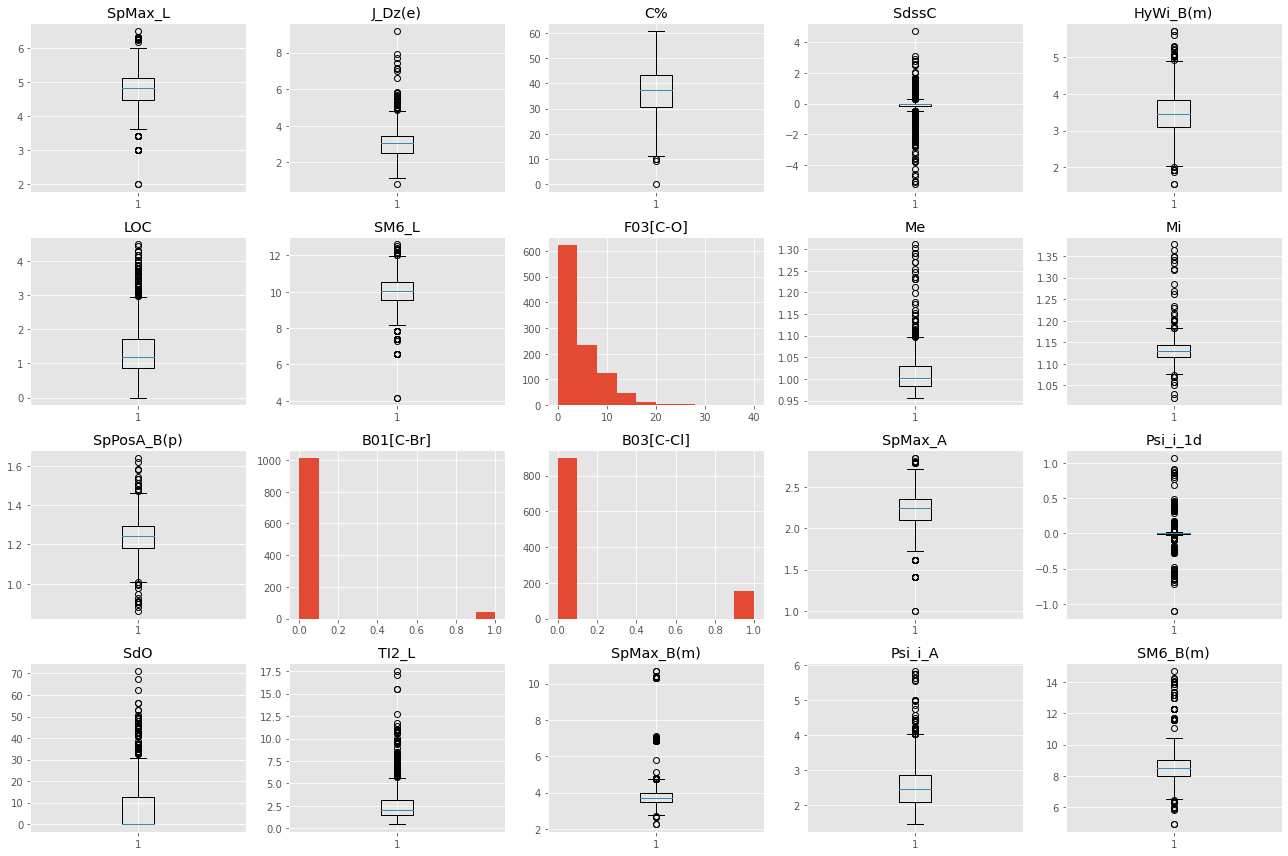

In [12]:
quali = [7, 11, 12]
quanti = [x for x in range(20) if x not in quali]
data_quali = data.iloc[:, quali]

fig, ax = plt.subplots(4, 5, figsize = (18,12))
index = 0
for i in range(4):
    for j in range(5):
      index = 5*i + j
      if index in quanti:
        ax[i,j].boxplot(data.iloc[:, index])
        ax[i,j].set_title(data.columns.values[index])
      else:
        ax[i, j].hist(data.iloc[:, index])
        ax[i, j].set_title(data.columns.values[index])

plt.tight_layout()
plt.show()

## Multidimensional

<ipython-input-41-f5cf30579fc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:, quali[0]][ data.iloc[:, quali[0]] != 0] = 1


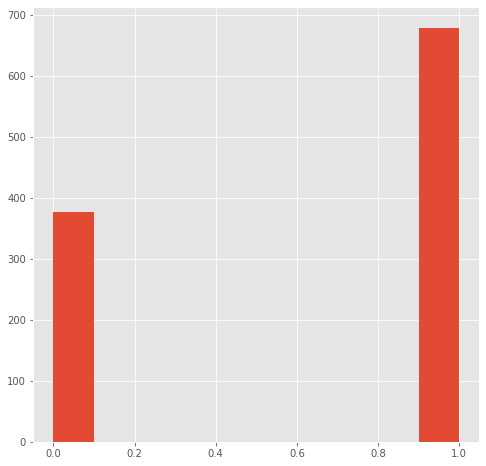

In [41]:
data.iloc[:, quali[0]][ data.iloc[:, quali[0]] != 0] = 1
plt.hist(data.iloc[:, quali[0]])
plt.rcParams["figure.figsize"] = (8,8)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
quanti_scaled = scaler.fit_transform(data.iloc[:, quanti])
quanti_scaled = pd.DataFrame(quanti_scaled, columns=data.columns.values[quanti])

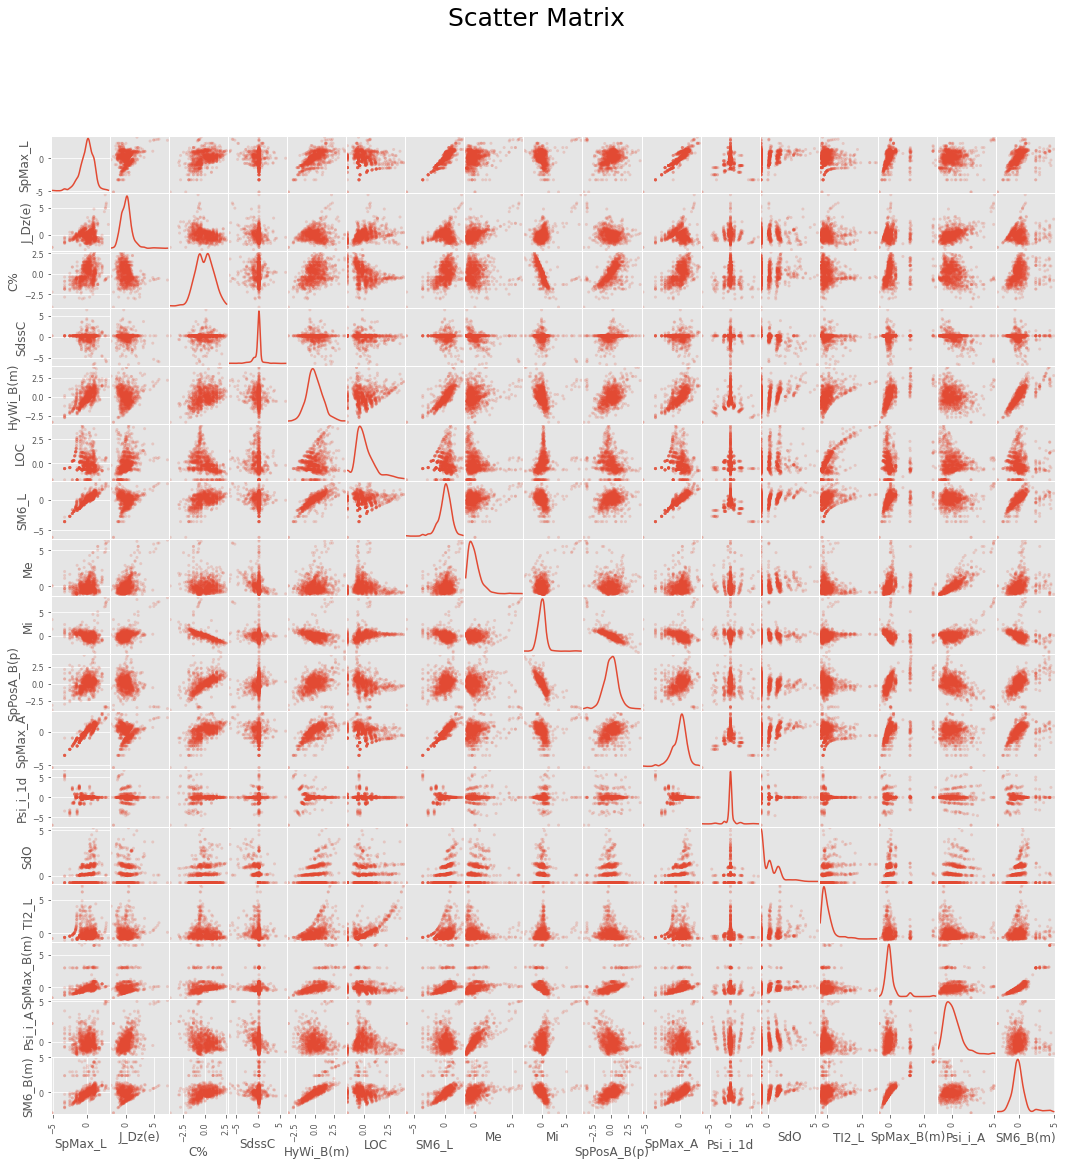

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(quanti_scaled, alpha=0.2, figsize=(18, 18), diagonal='kde')
plt.suptitle("Scatter Matrix", fontsize=25)
plt.show()

Text(0.5, 0.98, 'Correlation plot ')

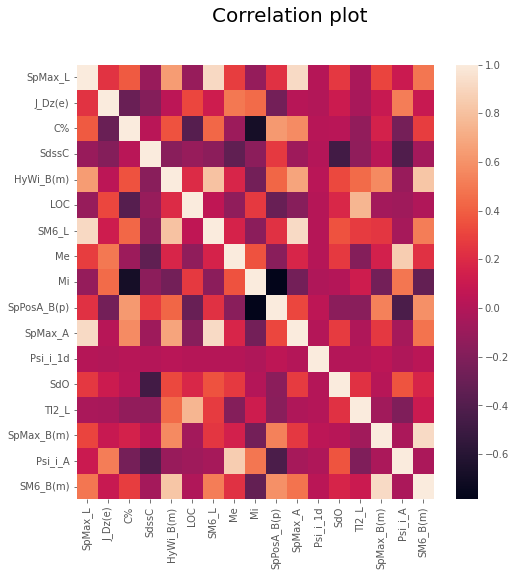

In [42]:
sns.heatmap(quanti_scaled.corr() )
plt.rcParams['figure.figsize'] = 12,10
plt.suptitle(u"Correlation plot ", fontsize=20)

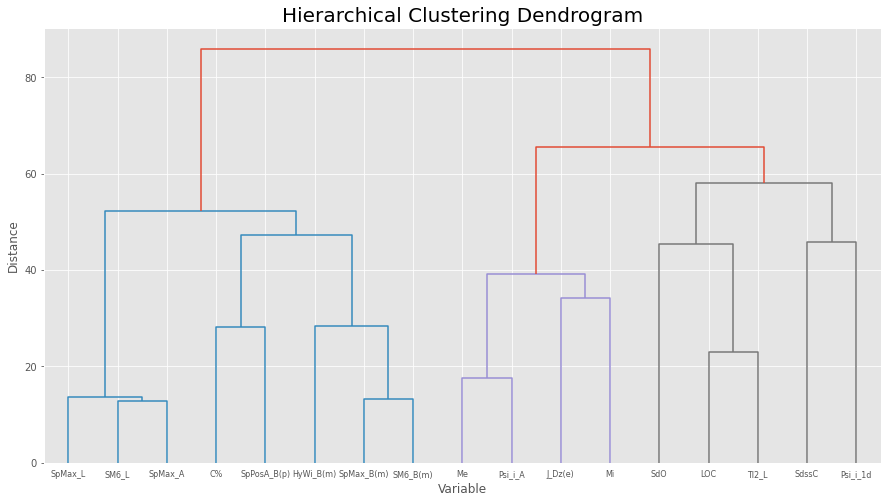

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(quanti_scaled.T, 'ward')
plt.figure(figsize=(15, 8))
plt.title(u'Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Variable')
plt.ylabel('Distance')
dendrogram(Z,leaf_font_size=8.,labels=quanti_scaled.columns)
plt.show()

## ACP

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(quanti_scaled)

Text(0.5, 0.98, 'ACP Result')

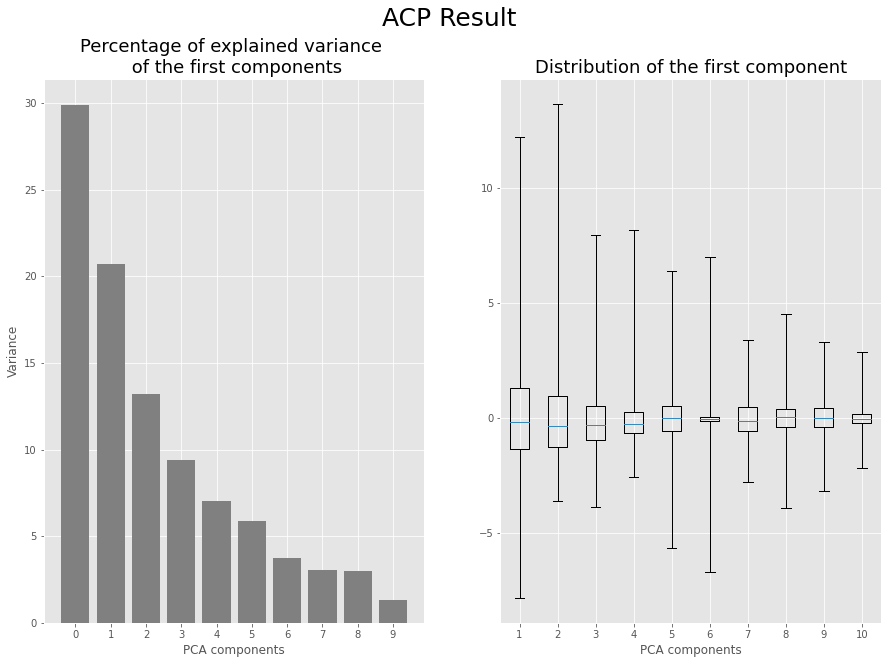

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), pca.explained_variance_ratio_[:10]*100, align='center', color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_xlabel("PCA components")
ax.set_title(u"Percentage of explained variance \n of the first components", fontsize=18)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(data_pca[:,0:10],whis=100)
ax.set_title(u"Distribution of the first component", fontsize=18)
ax.set_xlabel("PCA components")

fig.suptitle(u"ACP Result", fontsize=25)

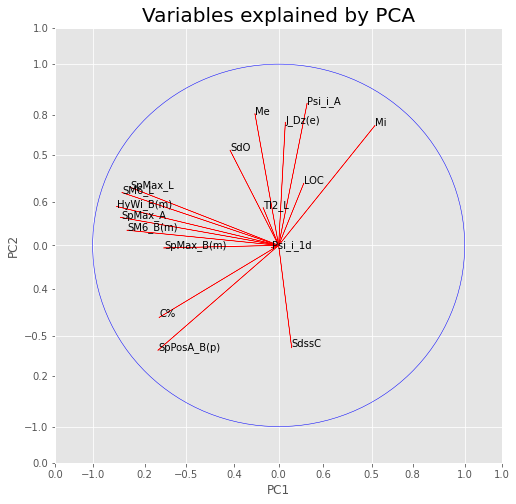

In [19]:
fig = plt.figure(figsize = (8, 8))
plt.title('Variables explained by PCA', fontsize=20)

# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns.values[quanti]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
ax.set_xlabel("PC1")
ax.set_ylabel('PC2')

# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

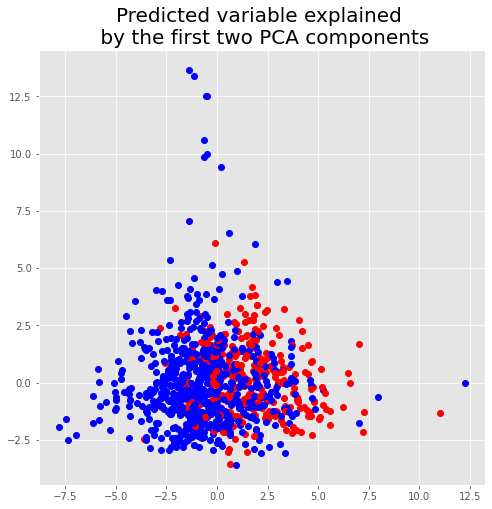

In [20]:
fig = plt.figure(figsize=(8,8))
plt.title('Predicted variable explained \n by the first two PCA components', fontsize=20)

for i, j, bio in zip(data_pca[:,0], data_pca[:,1], biodeg["41"].to_numpy()):
    color = "red" if bio else "blue"
    plt.plot(i, j, "o", color=color)
plt.show()

## Qualitative variables and predicted variable

<ipython-input-44-37768985cc7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quali_bio['biodeg'] = biodeg
<ipython-input-44-37768985cc7c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append( count_dif(quali_bio1.iloc[:, 0]) , ignore_index=True)
<ipython-input-44-37768985cc7c>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append( count_dif(quali_bio1.iloc[:, 1]) , ignore_index=True)
<ipython-input-44-37768985cc7c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

Text(0, 0.5, 'Count')

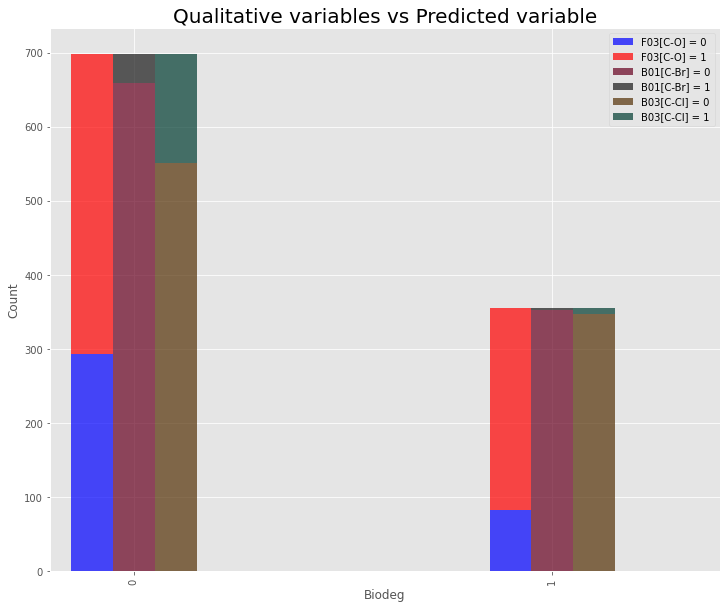

In [44]:
def count_dif(x) :
  return pd.DataFrame([[len(x[x==u]) for u in np.sort(x.unique())]], columns = np.sort(x.unique()))

quali_bio = data.iloc[:, quali]
quali_bio['biodeg'] = biodeg

quali_bio0 = quali_bio[quali_bio['biodeg']==0]
quali_bio1 = quali_bio[quali_bio['biodeg']==1]

fig, ax = plt.subplots()

a = count_dif(quali_bio0.iloc[:,0])
a = a.append( count_dif(quali_bio1.iloc[:, 0]) , ignore_index=True)
a = a.add_prefix(quali_bio1.columns.values[0]+' = ')
a.plot.bar(stacked=True, width=0.1, position=1.5, colormap="bwr", ax=ax, alpha=0.7)

# print(a)

a = count_dif(quali_bio0.iloc[:,1])
a = a.append( count_dif(quali_bio1.iloc[:, 1]) , ignore_index=True)
a = a.add_prefix(quali_bio1.columns.values[1]+' = ')
a.plot.bar(stacked=True, width=0.1, position=0.5, colormap="RdGy", ax=ax, alpha=0.7)

# print(a)

a = count_dif(quali_bio0.iloc[:,2])
a = a.append( count_dif(quali_bio1.iloc[:, 2]) , ignore_index=True)
a = a.add_prefix(quali_bio1.columns.values[2]+' = ')
a.plot.bar(stacked=True, width=0.1, position=-0.5, colormap="BrBG", ax=ax, alpha=0.7)

plt.title('Qualitative variables vs Predicted variable', fontsize = 20)
plt.xlabel('Biodeg')
plt.ylabel('Count')